In [1]:
from sympy import symbols
import qutip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sympy as sp
from math import factorial as fact

In [22]:
from scipy import constants as const

In [23]:
const.hbar

1.0545718176461565e-34

In [3]:
sp.diag(1,0,0)

Matrix([
[1, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [13]:
g = symbols('g ', real=True)
y = symbols('y', real=True)                  #reprsents root gamma
t = symbols('t', positive=True)                  #reprsents root gamma

basis = [sp.diag(1,0,0,0), sp.diag(0,1,0,0), sp.diag(0,0,1,0), sp.diag(0,0,0,1)]


In [14]:
t

t

In [5]:
c = sp.Matrix(qutip.tensor(qutip.destroy(2), qutip.qeye(2)) )
a = sp.Matrix( qutip.tensor(qutip.qeye(2), qutip.destroy(2)) )
L0 = y*c + g*a 
L0_d = L0.conjugate().T
H = 1j*0.5*g* y *(c.conjugate().T*a - a.conjugate().T*c)

In [6]:
def L(m):
    #d_rho = -1j*( (H@m) - (m@H) )  +  (L0@m@L0_d) - 0.5*( (L0_d@L0@m) + (m@L0_d@L0) ) 
    d_rho = 1j*m@H - 1j*H@m   +  L0@m@L0_d - 0.5*L0_d@L0@m - 0.5*m@L0_d@L0 
    return d_rho

In [8]:
super_op = 0*sp.eye( 4 )
for i in range(4):
    for j in range(4):
        '''
        mat = basis[i] @ (L(basis[j]))
        trace = 0j + (g*0) 
        for k in range(4):
            trace += mat[k][k]
        super_op[i][j] = (trace)
        
        #print(np.trace(np.real(mat)) + 1j*np.trace(np.imag(mat)))
        #super_op[i][j] = np.trace( basis[i] @ (L(basis[j])) , dtype=np.complex) 
        print("===============================================================")
        print(i,"  ",j)
        print(mat)
        '''
        super_op[i,j] = sp.trace( basis[i] @ L(basis[j]) )

In [9]:
super_op = sp.simplify(super_op)


In [11]:
super_op

Matrix([
[0,  1.0*g**2,  1.0*y**2,                    0],
[0, -1.0*g**2,         0,             1.0*y**2],
[0,         0, -1.0*y**2,             1.0*g**2],
[0,         0,         0, -1.0*g**2 - 1.0*y**2]])

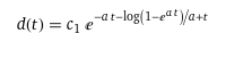

In [15]:
sp.exp(t*super_op)

Matrix([
[1.0, 1.0 - 1.0*exp(-g**2*t), 1.0 - 1.0*exp(-t*y**2), 1.0*exp(t*(-g**2 - y**2)) + 1.0 - 1.0*exp(-t*y**2) - 1.0*exp(-g**2*t)],
[  0,       1.0*exp(-g**2*t),                      0,                         -1.0*exp(t*(-g**2 - y**2)) + 1.0*exp(-g**2*t)],
[  0,                      0,       1.0*exp(-t*y**2),                         -1.0*exp(t*(-g**2 - y**2)) + 1.0*exp(-t*y**2)],
[  0,                      0,                      0,                                             1.0*exp(t*(-g**2 - y**2))]])

In [17]:
rho_0 = sp.Matrix(4,1,[0,0,1,0])
rho_0

Matrix([
[0],
[0],
[1],
[0]])

In [18]:
sp.exp(t*super_op)@rho_0

Matrix([
[1.0 - 1.0*exp(-t*y**2)],
[                     0],
[      1.0*exp(-t*y**2)],
[                     0]])

In [141]:
expm = sp.eye(16)
for x in range(1,11):
    expm =+ sp.simplify(super_op**x)/fact(x)
    expm = sp.simplify(expm)
    print (x)

1
2
3
4
5
6
7
8
9
10


In [19]:
sp.constants.hbar

AttributeError: module 'sympy' has no attribute 'constants'

In [153]:
test1 = sp.simplify(super_op.subs(y,1))
test1

Matrix([
[       0,         0,         0,         0,        0,               0,               0,               0,        0,               0,               0,               0,        0,               0,               0,               0],
[       0, -0.5*g**2,         0,         0,        0,               0,               0,          -1.0*g,        0,               0,               0,               0,        0,               0,               0,               0],
[       0,         0, -0.5*g**2,         0,        0,               0,               0,               0,        0,               0,               0,          -1.0*g,        0,               0,               0,               0],
[1.0*g**2,         0,         0, -1.0*g**2,        0,           1.0*g,               0,               0,        0,               0,           1.0*g,               0,        0,               0,               0,               0],
[       0,         0,         0,         0,     -0.5,               0,         

In [154]:
P, D = test1.diagonalize()
D

KeyboardInterrupt: 